In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Values sent to me
CFA=25
CFR=15

# equal probabilities
equal_apriori = 0.5

# number of thresholds
num_thresholds = 100

In [18]:
def gen_thersholds(n):
    """ Generate a list of  n thresholds between 0.0 and 1.0"""
    thersholds = []
    for x in range(1,n+1):
        thersholds.append(float("{:.9f}".format(random.uniform(0.0,1))))

    return sorted(thersholds)

In [19]:
def read_data():
    """ Read data from files and sort it """

    # Lists to store our data
    imposter = []
    genuine = []

    # open both text files
    with open('Scores/scoresA_impostores', 'r') as i, open('Scores/scoresA_clientes', 'r') as g:
        imposter = i.read()
        genuine = g.read()

        imposter = imposter.split()
        imposter = [float(i) for i in imposter]

        genuine = genuine.split()
        genuine = [float(g) for g in genuine]

    return sorted(genuine), sorted(imposter)

In [36]:
def plot_scores(imposter, genuine):
    """ Plot the scores of the genuine and imposters """

    # Draws a histogram to show score frequencies with values.
    plt.hist(imposter, facecolor='g', alpha=0.50, label='Imposter')
    plt.hist(genuine, facecolor='y', alpha=0.50, label='Client')

    # Adding labels and titles to the plot
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title('Score Distribution')
    plt.grid(True)

    # draw the key/legend
    plot_legends()

    # show the plot
    show_plot()

In [21]:
def calculate_cost(num_of_thresholds, imposter, genuine):
    """ For both users, calculates a confusion matrix and then calculates cost per threshold """

    # generate n number of thresholds
    thersholds = gen_thersholds(num_thresholds)

    far = []
    frr = []
    cost = []

    # for each threshold, calculate confusion matrix.
    for t in thersholds:

        FP = 0
        FN = 0
        TP = 0
        TN = 0

        # go through imposters
        for score in imposter:

            if score >= t:
                # imposter passes as a genuine user
                FP += 1
            else:
                # imposter correctly rejected
                TN += 1

        for score in genuine:
            if score >= t:
                # genuine user correctly identified
                TP += 1
            else:
                # genuine user incorrectly rejected
                FN += 1

        far_current = float(FP) / float(len(imposter))
        frr_current = float(FN) / float(len(genuine))

        # calculate our false accept rate(FAR) and add to list
        far.append(far_current)

        # calculate our false reject rate(FRR) and add to list
        frr.append(frr_current)

        # based on the FAR and FRR calculate cost, add to list
        cost.append((CFA * equal_apriori * far_current) + (CFR * equal_apriori * frr_current))

    return cost, far, frr

In [22]:
def plot_DET_with_EER(far, frr, far_optimum, frr_optimum):
    """ Plots a DET curve with the most suitable operating point based on threshold values"""

    # Plot the DET curve based on the FAR and FRR values
    plt.plot(far, frr, linestyle="--", linewidth=4, label="DET Curve")

    # Plot the optimum point on the DET Curve
    plt.plot(far_optimum,frr_optimum, "ro", label="Suitable Operating Point")

    # Draw the default DET Curve from 1-1
    plt.plot([1.0,0.0], [0.0,1.0],"k--")

    # Draws the key/legend
    plot_legends()

    # Displays plots
    show_plot()

In [23]:
def find_EER(far, frr):
    """ Returns the most optimal FAR and FRR values """

    # The lower the equal error rate value,
    # the higher the accuracy of the biometric system.

    t = []
    far_optimum = 0
    frr_optimum = 0

    # go through each value for FAR and FRR, calculate
    for i in range(num_thresholds):
        t.append(far[i] + frr[i])

    # smallest value is most accurate
    smallest = min(t)

    for i in range(num_thresholds):
        if smallest == far[i] + frr[i]:

            # Found EER
            far_optimum = far[i]
            frr_optimum = frr[i]
            break

    return far_optimum, frr_optimum

In [24]:
def plot_legends():
    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('#ffffff')
    
def show_plot():
    plt.show()

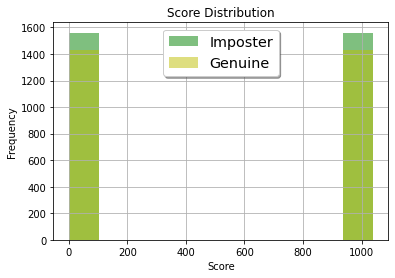

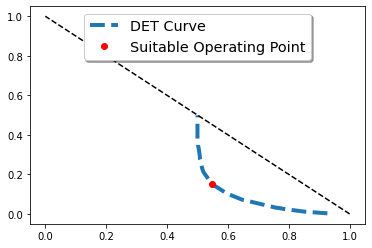

In [33]:
# read data from files and sort it
    genuine, imposter  = read_data()

    # calculate cost, FAR and FRR for each threshold value
    costs, far, frr = calculate_cost(num_thresholds, imposter, genuine)

    # calculate optimum operating point
    far_optimum, frr_optimum = find_EER(far, frr)

    # plot the file data in a histogram to show the distribution
    # and frequency of score data
    plot_scores(imposter, genuine)

    # plot the det curve and optimal operating point (i.e EER)
    plot_DET_with_EER(far, frr, far_optimum, frr_optimum)

In [34]:
def read_data2():
    """ Read data from files and sort it """

    # Lists to store our data
    imposter2 = []
    genuine2 = []

    # open both text files
    with open('Scores/scoresB_impostores', 'r') as a, open('Scores/scoresB_clientes', 'r') as s:
        imposter2 = a.read()
        genuine2 = s.read()

        imposter2 = imposter2.split()
        imposter2 = [float(i) for i in imposter2]

        genuine2 = genuine2.split()
        genuine2 = [float(g) for g in genuine2]

    return sorted(genuine2), sorted(imposter2)

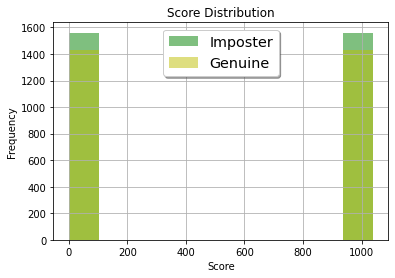

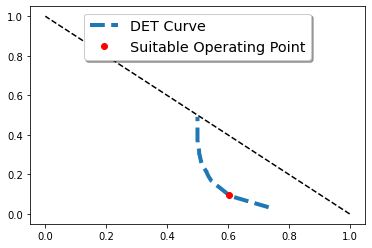

In [35]:
# read data from files and sort it
    genuine, imposter  = read_data2()

    # calculate cost, FAR and FRR for each threshold value
    costs, far, frr = calculate_cost(num_thresholds, imposter, genuine)

    # calculate optimum operating point
    far_optimum, frr_optimum = find_EER(far, frr)

    # plot the file data in a histogram to show the distribution
    # and frequency of score data
    plot_scores(imposter, genuine)

    # plot the det curve and optimal operating point (i.e EER)
    plot_DET_with_EER(far, frr, far_optimum, frr_optimum)